# Prime Number Benchmark

This code is a benchmarking script to test the performance of program that uses the multiprocessing library. The program calculates the number of prime numbers in a given range and performs the calculation using a pool of worker processes. The number of worker processes, the range of numbers to search, and the number of runs of the test are all adjustable. The script measures the time taken for each run and calculates the average, lowest, and highest times taken. The results of each test are saved in a dictionary and appended to a list of test results. The script then prints the results of the tests and provides information on the CPU count and the elapsed time of the entire benchmarking process.

In [3]:
import multiprocessing
import math
import time
import os


total_primes = 0
average_time = 0
lowest_time = 0
highest_time = 0
run_times_temp = []
test_times = []


def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(math.sqrt(n)) + 1):
        if n % i == 0:
            return False
    return True

def find_number_of_primes(start, end):
    return sum(1 for i in range(int(start), int(end)) if is_prime(i))  # adds 1 to the sum for every prime number in the range

def pool_method(worker_count):  # i think this is working as intended
    global total_primes
    counter = 0
    results = []

    chunk_size = counter_ceiling / worker_count
    chunks = [(i, i + chunk_size) for i in range(0, int(counter_ceiling), int(chunk_size))]

    with multiprocessing.Pool(processes=worker_count) as pool:
        for i in range(pool.__getattribute__('_processes')):
            results.append(pool.apply_async(find_number_of_primes,args=(chunks[i])))  # adds the result of the function to the list

            if counter == 0:
                for result in results:
                    total_primes += result.get()
                counter += 1
            else:  # you have to run result.get everytime
                for result in results:
                    result.get()
        pool.close()

def get_average(worker_count, run_count):
    global run_times_temp
    run_times_temp = [] # clear the list, as it is temporary
    total_time = 0

    for i in range(run_count):
        # os.system('cls' if os.name == 'nt' else 'clear')
        print("workers: ", worker_count, end='')
        print(f"Run {i} / {run_count}   ", end='')

        run_timer_start = time.time()
        pool_method(worker_count)
        run_timer_end = time.time()

        run_time = (run_timer_end - run_timer_start)
        temp_tuple = (i, run_time)
        run_times_temp.append(temp_tuple)
        total_time += run_time

        print(round(run_time, 3), 'seconds')

    average_run_time = total_time / run_count
    lowest_run_time = min(run_times_temp, key=lambda x: x[1])[1]
    highest_run_time = max(run_times_temp, key=lambda x: x[1])[1]
    test_times.append({'processes': worker_count, 'average_time': average_run_time, 'lowest_time': lowest_run_time, 'times': run_times_temp})



    print("numbers searched: ", counter_ceiling)
    print("primes found: ", total_primes)
    print("cpu count: ", os.cpu_count())
    print("processes: ", worker_count)
    print(f"Average time taken: {round(average_run_time, 3)} seconds")
    print(f"Lowest time taken: {round(lowest_run_time, 3)} seconds")
    print(f"Highest time taken: {round(highest_run_time, 3)} seconds")
    print("------------------------------------")
   # print('total elapsed time: ', round(end__global_time - start_global_time, 3), 'seconds')


def run_bench(worker_count, runs):
    for i in range(0, worker_count + 1, 2): # CORE COUNT PLUS ONE PROBALY NEEDS FIXING LATER
        if i == 0:
            get_average(1, runs)
        else: get_average(i, runs)


if __name__ == '__main__':
    counter_ceiling = 1_000

    start_global_time = time.time()
    run_bench(runs=5, worker_count=16) # must be a multiple of 2
    #get_average(run_count=100, worker_count=1)

    end__global_time = time.time()
    input("Press enter to exit")

workers:  1Run 0 / 5   0.022 seconds
workers:  1Run 1 / 5   0.023 seconds
workers:  1Run 2 / 5   0.021 seconds
workers:  1Run 3 / 5   0.022 seconds
workers:  1Run 4 / 5   0.022 seconds
numbers searched:  1000
primes found:  840
cpu count:  64
processes:  1
Average time taken: 0.022 seconds
Lowest time taken: 0.021 seconds
Highest time taken: 0.023 seconds
------------------------------------
workers:  2Run 0 / 5   0.026 seconds
workers:  2Run 1 / 5   0.026 seconds
workers:  2Run 2 / 5   0.023 seconds
workers:  2Run 3 / 5   0.029 seconds
workers:  2Run 4 / 5   0.029 seconds
numbers searched:  1000
primes found:  1315
cpu count:  64
processes:  2
Average time taken: 0.027 seconds
Lowest time taken: 0.023 seconds
Highest time taken: 0.029 seconds
------------------------------------
workers:  4Run 0 / 5   0.043 seconds
workers:  4Run 1 / 5   0.043 seconds
workers:  4Run 2 / 5   0.047 seconds
workers:  4Run 3 / 5   0.045 seconds
workers:  4Run 4 / 5   0.039 seconds
numbers searched:  1000


# THIS ONLY WORKS FOR THE BENCH FUNCTION

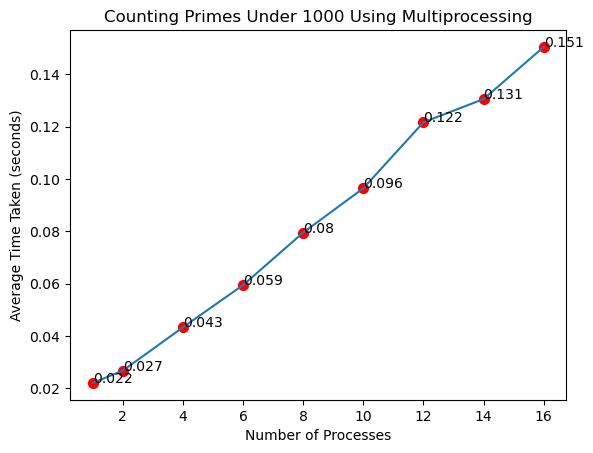

lowest recorded time:  0.021303415298461914 seconds with 1 processes


In [4]:
import matplotlib.pyplot as plt

lowest_time = 0

def plot_results():
    global test_times,lowest_time
    x = []
    y = []
    for i in range(len(test_times)):
        x.append(test_times[i]['processes'])
        y.append(test_times[i]['average_time'])

    lowest_time = min(test_times, key=lambda x: x['lowest_time'])['lowest_time']

    plt.plot(x, y)
    plt.xlabel('Number of Processes')
    plt.ylabel('Average Time Taken (seconds)')

    plt.scatter(x, y, c='r', s=50)

    for i, label in enumerate(y):
        plt.annotate(round(label,3), (x[i], y[i]))

    plt.title('Counting Primes Under ' + str(counter_ceiling) + ' Using Multiprocessing')
    plt.show()
plot_results()
print("lowest recorded time: ", lowest_time, "seconds", "with", min(test_times, key=lambda x: x['lowest_time'])['processes'], "processes")


# THIS ONLY WORKS FOR THE GET AVG FUNCTION

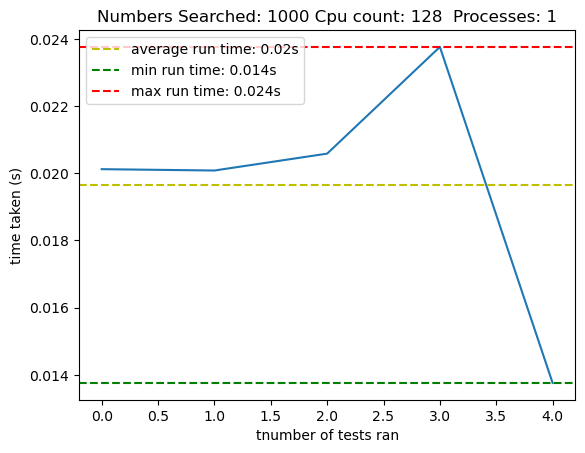

In [44]:

x = [i[0] for i in test_times[0]['times']]
y = [i[1] for i in test_times[0]['times']]
min_time = min(y)
max_time = max(y)
average_time = test_times[0]['average_time']

# labels
plt.xlabel('number of tests ran')
plt.ylabel('time taken (s)')
plt.title("Numbers Searched: "+str(counter_ceiling) +" Cpu count: "+str(os.cpu_count())+"  Processes: "+str(test_times[0]['processes']))

plt.plot(x,y)
plt.axhline(y=average_time, color='y', linestyle='--', label="average run time: "+str(round(average_time,3))+"s")
plt.axhline(y=min_time, color='g', linestyle='--', label="min run time: "+str(round(min_time,3))+"s")
plt.axhline(y=max_time, color='r', linestyle='--', label="max run time: "+str(round(max_time,3))+"s")
plt.legend()
plt.show()
